In [2]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time

In [3]:
import os

base_dir = r'C:\Users\user\OneDrive - 台灣智園有限公司\文件\＊WG_New_2020_May\新-上開2020\交付物\交付物１：学习数据指标设计报告\6.20前给上开\课程一问卷\课程一 - training dataset'
train_dir = os.path.join(base_dir, 'training_dataset')

# Directory with our training unenthusiastic teaching pictures
train_unenthusiastic_dir = os.path.join(train_dir, 'unenthusiastic')

# Directory with our training enthusiastic teaching pictures
train_enthusiastic_dir = os.path.join(train_dir, 'enthusiastic')


In [4]:
train_unenthusiastic_fnames = os.listdir(train_unenthusiastic_dir)
train_unenthusiastic_fnames.sort()
print(train_unenthusiastic_fnames[:10])

train_enthusiastic_fnames = os.listdir(train_enthusiastic_dir)
print(train_enthusiastic_fnames[:10])

print('total training unenthusiastic images:', len(os.listdir(train_unenthusiastic_dir)))
print('total training enthusiastic images:', len(os.listdir(train_enthusiastic_dir)))


['unenthusiastic1.png', 'unenthusiastic10.png', 'unenthusiastic100.png', 'unenthusiastic101.png', 'unenthusiastic102.png', 'unenthusiastic103.png', 'unenthusiastic104.png', 'unenthusiastic105.png', 'unenthusiastic106.png', 'unenthusiastic107.png']
['enthusiastic1.png', 'enthusiastic10.png', 'enthusiastic100.png', 'enthusiastic101.png', 'enthusiastic102.png', 'enthusiastic103.png', 'enthusiastic104.png', 'enthusiastic105.png', 'enthusiastic106.png', 'enthusiastic107.png']
total training unenthusiastic images: 118
total training enthusiastic images: 134


In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

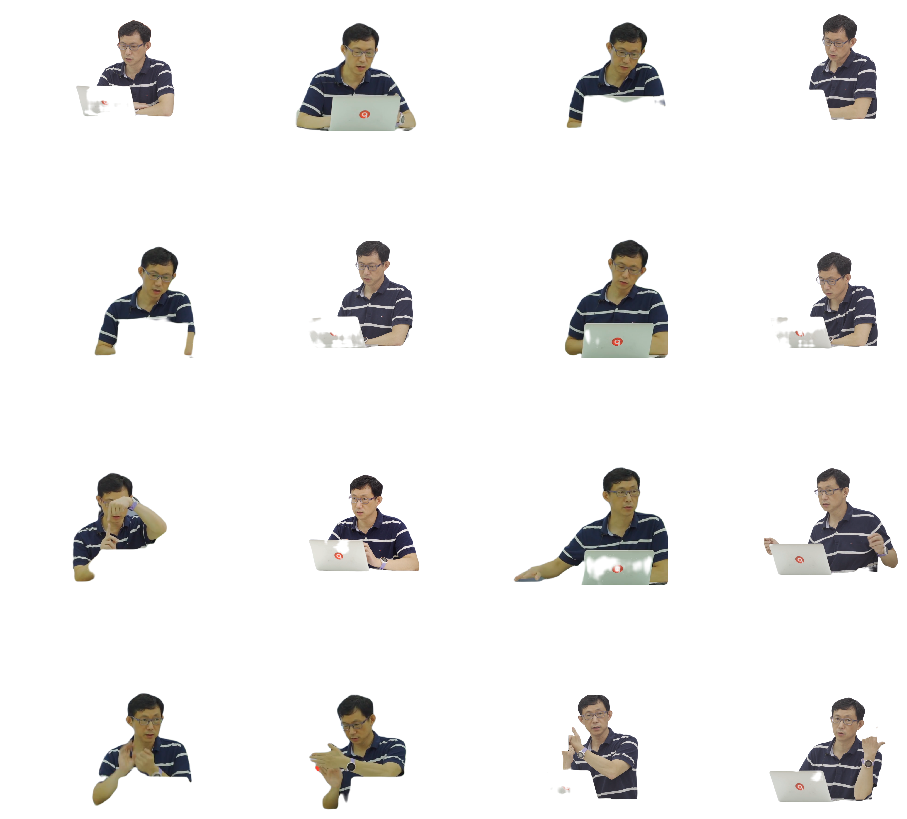

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_unenthusiastic_pix = [os.path.join(train_unenthusiastic_dir, fname) 
                for fname in train_unenthusiastic_fnames[pic_index-8:pic_index]]
next_enthusiastic_pix = [os.path.join(train_enthusiastic_dir, fname) 
                for fname in train_enthusiastic_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_unenthusiastic_pix+next_enthusiastic_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [67]:
from tensorflow.keras import layers
from tensorflow.keras import Model

# Our input feature map is 480X270x3: 480X270 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(480, 270, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)


In [8]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 480, 270, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 478, 268, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 239, 134, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 237, 132, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 118, 66, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 116, 64, 64)       18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 58, 32, 64)        0     

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(480, 270),  # All images will be resized to 480X270
        classes= ['unenthusiastic', 'enthusiastic'],    #defult: 0为前者, 1会后者
        batch_size=18,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 252 images belonging to 2 classes.


In [12]:
train_labels = train_generator.classes 
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=14,  # 252 images = batch_size * steps
      epochs=4,
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 14 steps
Epoch 1/4
14/14 - 84s - loss: 1.5244 - acc: 0.5913
Epoch 2/4
14/14 - 80s - loss: 0.5521 - acc: 0.7103
Epoch 3/4
14/14 - 86s - loss: 0.4152 - acc: 0.8135
Epoch 4/4
14/14 - 79s - loss: 0.2161 - acc: 0.9127


In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a unenthusiastic or ununenthusiastic from the training set.
unenthusiastic_img_files = [os.path.join(train_unenthusiastic_dir, f) for f in train_unenthusiastic_fnames]
enthusiastic_img_files = [os.path.join(train_enthusiastic_dir, f) for f in train_enthusiastic_fnames]
img_path = random.choice(unenthusiastic_img_files + unenthusiastic_img_files)

img = load_img(img_path, target_size=(480, 270))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (480, 270, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 480, 270, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Text(0.5, 1.0, 'Training loss')

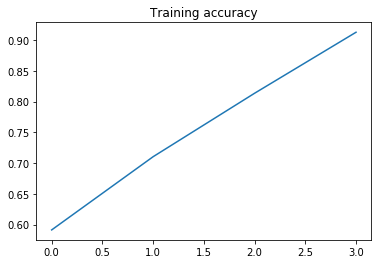

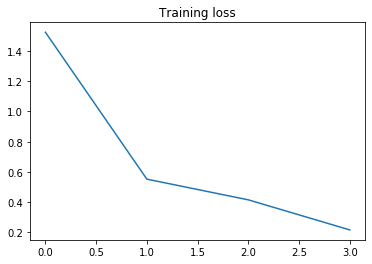

In [14]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.title('Training accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.title('Training loss')

In [15]:
import numpy as np
import skimage

unen_img = []
for i in range(118):
    img_path = os.path.join(train_unenthusiastic_dir, 'unenthusiastic'+str( (i+1))+'.png')
    img = load_img(img_path, target_size=(480, 270))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255
    unen_img.append(x)

len(unen_img)

118

In [28]:
prob_of_en_on_unenIMG = []
for i in range(118):
    a = model.predict(unen_img[i])
    a = a.flatten()
    a = a.tolist()
    prob_of_en_on_unenIMG.append(a)

prob_of_en_on_unenIMG
#You have predicted class probabilities. Since you are doing binary classification. 
#You have a dense layer consisting of one unit with an activation function of the sigmoid. 
#Sigmoid function outputs a value in the range [0,1] which corresponds to 
# the probability of the given sample belonging to a positive class (i.e. class one).

#通过train_labels = train_generator.classes 查询, 
#我们知道"enthusiastic"是1 (positive class), "unenthusiastic"是0 (negative class). 

[[0.057223137468099594],
 [0.13615204393863678],
 [0.22043733298778534],
 [0.07427452504634857],
 [0.03441790118813515],
 [0.5394471287727356],
 [0.022729940712451935],
 [0.13055504858493805],
 [0.04936739057302475],
 [0.04732690006494522],
 [0.5171380639076233],
 [0.15914641320705414],
 [0.060261934995651245],
 [0.311621755361557],
 [0.15288765728473663],
 [0.13576851785182953],
 [0.04867713525891304],
 [0.2434803545475006],
 [0.16046687960624695],
 [0.07872200757265091],
 [0.2784467339515686],
 [0.11864907294511795],
 [0.11518937349319458],
 [0.13318143784999847],
 [0.1567246913909912],
 [0.0634959265589714],
 [0.07584947347640991],
 [0.556717038154602],
 [0.20660893619060516],
 [0.4244762361049652],
 [0.04237988591194153],
 [0.17021441459655762],
 [0.40874946117401123],
 [0.08168419450521469],
 [0.15282928943634033],
 [0.3968696594238281],
 [0.2311725914478302],
 [0.5448462963104248],
 [0.5543065667152405],
 [0.14040254056453705],
 [0.056676603853702545],
 [0.1388154774904251],
 [0.

In [31]:
en_img = []
for i in range(134):
    img_path = os.path.join(train_enthusiastic_dir, 'enthusiastic'+str( (i+1))+'.png')
    img = load_img(img_path, target_size=(480, 270))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    x /= 255
    en_img.append(x)

len(en_img)

134

In [32]:
prob_of_en_on_enIMG = []
for i in range(134):
    b = model.predict(en_img[i])
    b = b.flatten()
    b = b.tolist()
    prob_of_en_on_enIMG.append(b)

prob_of_en_on_enIMG

[[0.9877154231071472],
 [0.9925082325935364],
 [0.8989453911781311],
 [0.9390745162963867],
 [0.9874368906021118],
 [0.936153769493103],
 [0.9614915251731873],
 [0.9708903431892395],
 [0.9726437926292419],
 [0.9548336267471313],
 [0.9370043277740479],
 [0.9920945763587952],
 [0.9431902766227722],
 [0.9667794704437256],
 [0.9773348569869995],
 [0.9921517372131348],
 [0.9510371685028076],
 [0.9986572265625],
 [0.97555011510849],
 [0.9904521703720093],
 [0.9696884751319885],
 [0.9397724270820618],
 [0.9713460803031921],
 [0.9549328684806824],
 [0.921147346496582],
 [0.9894160628318787],
 [0.941310465335846],
 [0.9815471172332764],
 [0.9507038593292236],
 [0.9361251592636108],
 [0.9790894389152527],
 [0.9968926906585693],
 [0.9772845506668091],
 [0.9971946477890015],
 [0.9739977121353149],
 [0.9955183267593384],
 [0.8581081032752991],
 [0.7190197706222534],
 [0.9897818565368652],
 [0.9964620471000671],
 [0.9891065955162048],
 [0.9902412295341492],
 [0.9892504215240479],
 [0.99892657995224]

In [33]:
unen_img_squeeze = []

for i in range(118):
    c = np.squeeze(unen_img[i], axis=0)
    unen_img_squeeze.append(c)

In [34]:
en_img_squeeze = []

for i in range(134):
    d = np.squeeze(en_img[i], axis=0)
    en_img_squeeze.append(d)

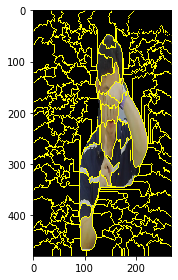

In [37]:
#Generate segmentation for image
import skimage.segmentation
superpixels = skimage.segmentation.quickshift(en_img_squeeze[0], kernel_size=4, max_dist=200, ratio=0.5)
num_superpixels = np.unique(superpixels).shape[0]
skimage.io.imshow(skimage.segmentation.mark_boundaries(en_img_squeeze[0], superpixels))


In [38]:
num_superpixels

140

In [39]:
#Generate perturbations
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, size=(num_perturb, num_superpixels))
perturbations.shape

(150, 140)

[1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1
 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1
 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1]


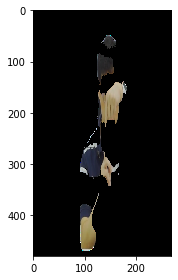

In [40]:
#Create function to apply perturbations to images
import copy
def perturb_image(img,perturbation,segments): 
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image*mask[:,:,np.newaxis]
  return perturbed_image

#Show example of perturbations
print(perturbations[0]) 
skimage.io.imshow(perturb_image(en_img_squeeze[0],perturbations[0],superpixels))

In [41]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(en_img_squeeze[0],pert,superpixels)
  pred = model.predict(perturbed_img[np.newaxis,:,:,:])
  predictions.append(pred)

predictions = np.array(predictions)
print(predictions.shape)

(150, 1, 1)


In [42]:
#Compute distances to original image
import sklearn.metrics
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled 
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
print(distances.shape)

#Transform distances to a value between 0 an 1 (weights) using a kernel function
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
print(weights.shape)

(150,)
(150,)


In [43]:
predictions_sq = np.squeeze(predictions, axis=1)

In [44]:
predictions_sq = np.squeeze(predictions_sq, axis=1)

In [45]:
#Estimate linear model
from sklearn.linear_model import LinearRegression
simpler_model = LinearRegression().fit(X=perturbations, y=predictions_sq, sample_weight=weights)
coeff = simpler_model.coef_

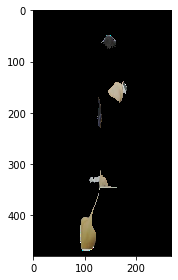

In [46]:
#Use coefficients from linear model to extract top features
num_top_features = 5
top_features = np.argsort(coeff)[-5:] #10 = num_top_features

#Show only the superpixels corresponding to the top features
mask = np.zeros(num_superpixels) 
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(en_img_squeeze[0],mask,superpixels))

In [47]:
def perturb_image2(mask, segments): 
  active_pixels = top_features
  mask = np.zeros(segments.shape)
  for active in active_pixels:
      mask[segments == active] = 1 
  return mask

C = perturb_image2(mask, superpixels)
D = np.int64(C)
D

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

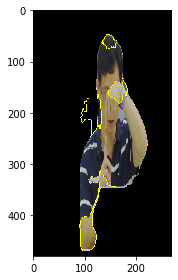

In [48]:
skimage.io.imshow(skimage.segmentation.mark_boundaries(en_img_squeeze[0], D))

In [49]:
from lime import lime_image
import time

In [50]:
explainer = lime_image.LimeImageExplainer()

In [51]:
explanation = explainer.explain_instance(en_img_squeeze[0], model, hide_color=0)

In [52]:
tmp = time.time()
print(time.time() - tmp)

0.0


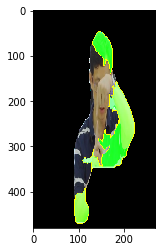

In [66]:
from skimage.segmentation import mark_boundaries
temp, mask = explanation.get_image_and_mask(0, positive_only=False, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask))

In [59]:
en_img_squeeze[0].shape #直接餵給inceptionV3_model.predict需要(batch_size, 299, 299, 3) = Xi[np.newaxis,:,:,:]
                        #餵給explainer.explain_instance只需(299, 299, 3) = Xi (非0-1 or 0-255)

(480, 270, 3)